### Plotting of Amplifier Simulation as Supplied by LNF

https://lownoisefactory.com/wp-content/uploads/2022/03/lnf-lnc4_8c.pdf

#### Imports

In [50]:
import glob
import numpy as np
import matplotlib.pyplot as plt

# Import skrf
import skrf.frequency as freq
import skrf.network as net

impedance = 50
min_freq = 2e9
max_freq = 10e9

#### Definitions

In [51]:
# confert noise figure to noise temperature
def nf_to_T(nf, T0=290, Z0=50):
    return T0 * (10**(nf/10) - 1)

#### Data loading 

In [52]:
rf_components_folder = '../../../../data/'
rf_components = glob.glob(rf_components_folder + '*')
rf_components

['../../../../data/LNF-LNC15_29B_sn141Z Vd=1.7V Id=50.0mA rt-spar_2.s2p',
 '../../../../data/LNF-LNC4_8C.s2p',
 '../../../../data/LNF-LNC16_28WB_sn149Z Vd=1.6V Id=40.0mA rt-spar_1.s2p']

In [53]:
# create an amplifier network
amp = net.Network(rf_components[1])

In [54]:
print(amp.__dict__.keys())
print(amp.noise_freq)
print(amp.T0)

dict_keys(['name', 'comments', 'port_names', 'deembed', 'noise', 'noise_freq', 'T0', 's_def', 'variables', '_z0', '_s', '_frequency'])
0.0-10.0 GHz, 101 pts
290.0


#### Plots

Text(0.5, 1.0, 'S11 and S22 Parameters')

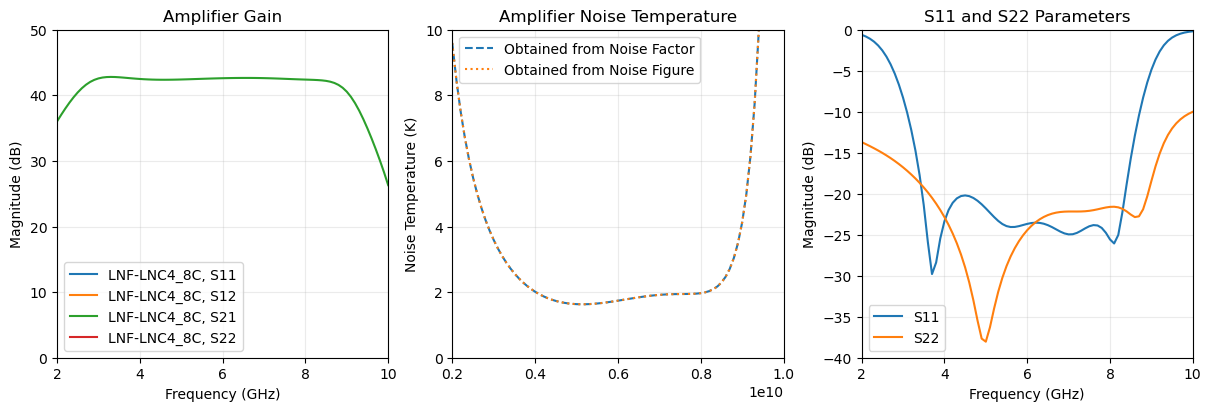

In [71]:
# plot the amplifier gain curve between min_freq and max_freq
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12, 4), constrained_layout=True)
amp.plot_s_db(ax=ax[0])
ax[0].set_xlim(min_freq, max_freq)
ax[0].set_ylim(0, 50)
ax[0].set_title('Amplifier Gain')
ax[0].grid(alpha=0.25)

# plot the amplifier noise temperature curve between min_freq and max_freq
# Method 1: Noise factor
noise_factor = amp.nf(impedance)
noise_temp1 = amp.T0*(noise_factor-1) #nf_to_T(noise_figure, amp.T0, impedance)
# Method 2: Noise figure
noise_figure = amp.nf_db(impedance)
noise_temp2 = nf_to_T(noise_figure, amp.T0, impedance)

ax[1].plot(amp.f, noise_temp1, label='Obtained from Noise Factor', linestyle='--')
ax[1].plot(amp.f, noise_temp2, label='Obtained from Noise Figure', linestyle=':')

ax[1].legend()
ax[1].set_xlim(min_freq, max_freq)
ax[1].set_ylim(0, 10)
ax[1].set_title('Amplifier Noise Temperature')
ax[1].set_ylabel('Noise Temperature (K)')
ax[1].grid(alpha=0.25)

# Plot the S11 and S22 parameters
amp.s11.plot_s_db(ax=ax[2], label='S11')
amp.s22.plot_s_db(ax=ax[2], label='S22')
ax[2].set_xlim(min_freq, max_freq)
ax[2].set_ylim(-40, 0)
ax[2].grid(alpha=0.25)
ax[2].set_title('S11 and S22 Parameters')

